<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Food-Image-Classifier/blob/main/YOLOv8_FOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 📌 1. 설치 및 준비
!pip install ultralytics --upgrade -q

from ultralytics import YOLO
import os
import pandas as pd
import matplotlib.pyplot as plt




In [4]:
import yaml

# 1. 원본 YAML 경로와 저장할 경로
original_yaml_path = "/content/drive/MyDrive/project/data.yaml"
new_dataset_root = "/content/drive/MyDrive/project/images"  # 실제 이미지 루트 경로

# 2. YAML 로드 및 수정
with open(original_yaml_path, "r", encoding="utf-8") as f:
    data = yaml.safe_load(f)

# 3. path + 폴더명 형식으로 변경
data['path'] = new_dataset_root
data['train'] = "train"
data['val'] = "val"
data['test'] = "test"

# 4. 덮어쓰기 저장
with open(original_yaml_path, "w", encoding="utf-8") as f:
    yaml.dump(data, f, allow_unicode=True)

# 5. 결과 확인
print("✅ data.yaml 경로가 Colab용으로 자동 수정되었습니다.")
print(f"📂 기준 디렉토리: {new_dataset_root}")


✅ data.yaml 경로가 Colab용으로 자동 수정되었습니다.
📂 기준 디렉토리: /content/drive/MyDrive/project/images


In [5]:
# ⚙️ 2. 사용자 설정
# 데이터 yaml 경로
data_yaml_path = '/content/drive/MyDrive/project/data.yaml'

# 저장 경로 설정
save_dir = '/content/drive/MyDrive/project/runs/detect'

# 모델 로드
model = YOLO('yolov8x.pt')

# 🏋️ 3. 학습 시작
model.train(
    data=data_yaml_path,     # train/val/test 포함된 YAML
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolo_food_detection',
    project=save_dir,
    save=True,
    save_period=1,
    val=True,
    verbose=True
)

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/project/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_food_detection2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

100%|██████████| 22.2M/22.2M [00:00<00:00, 157MB/s] 

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              


  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.3±0.1 ms, read: 1.1±0.3 MB/s, size: 433.8 KB)


train: Scanning /content/drive/MyDrive/project/labels/train... 3199 images, 0 backgrounds, 1 corrupt: 100%|██████████| 3200/3200 [04:08<00:00, 12.90it/s]

train: /content/drive/MyDrive/project/images/train/B090337XX_31812.jpg: ignoring corrupt image/label: image file is truncated (14 bytes not processed)


train: New cache created: /content/drive/MyDrive/project/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.8±0.3 MB/s, size: 481.9 KB)


val: Scanning /content/drive/MyDrive/project/labels/val... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [01:07<00:00, 11.82it/s]

val: New cache created: /content/drive/MyDrive/project/labels/val.cache


Plotting labels to /content/drive/MyDrive/project/runs/detect/yolo_food_detection2/labels.jpg... 


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytic

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/project/runs/detect/yolo_food_detection2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.5G      1.019      3.953      1.545         50        640:   1%|          | 2/200 [00:01<02:07,  1.56it/s]

       1/50      11.5G     0.9139      4.002      1.464         45        640:   2%|▏         | 4/200 [00:01<01:17,  2.54it/s]
100%|██████████| 755k/755k [00:00<00:00, 14.6MB/s]
       1/50      11.5G     0.8103      1.211      1.359         43        640: 100%|██████████| 200/200 [00:49<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.25it/s]


                   all        800        912      0.691      0.701      0.749      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      14.7G     0.9727      1.027      1.459         41        640: 100%|██████████| 200/200 [00:44<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.88it/s]


                   all        800        912      0.539      0.438      0.388      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      14.8G     0.9639     0.9948      1.457         44        640: 100%|██████████| 200/200 [00:48<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.83it/s]


                   all        800        912      0.818      0.757      0.818      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      14.8G     0.9075      0.939      1.411         44        640: 100%|██████████| 200/200 [00:53<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.78it/s]


                   all        800        912      0.829      0.743      0.858       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      14.9G     0.8826     0.8987      1.395         50        640: 100%|██████████| 200/200 [00:53<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.78it/s]


                   all        800        912      0.687      0.722      0.768      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      14.9G     0.8573     0.8438      1.363         48        640: 100%|██████████| 200/200 [00:48<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.83it/s]


                   all        800        912      0.822      0.784      0.867      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        15G     0.8079     0.8252      1.342         46        640: 100%|██████████| 200/200 [00:55<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.84it/s]


                   all        800        912       0.79      0.807      0.879       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        15G     0.8013     0.7872      1.327         40        640: 100%|██████████| 200/200 [00:55<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        800        912      0.807      0.779      0.865      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      15.1G     0.7645     0.7417      1.299         45        640: 100%|██████████| 200/200 [00:48<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]

                   all        800        912      0.839      0.747      0.871      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      15.7G     0.7478     0.7234      1.291         29        640: 100%|██████████| 200/200 [00:54<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]

                   all        800        912      0.857      0.789      0.884      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      15.8G     0.7411     0.7049       1.28         36        640: 100%|██████████| 200/200 [00:48<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.72it/s]


                   all        800        912      0.819      0.806      0.885      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      16.6G     0.7298     0.6981      1.271         47        640: 100%|██████████| 200/200 [00:56<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.86it/s]


                   all        800        912      0.847      0.772       0.88      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      16.7G     0.7198     0.7017      1.263         50        640: 100%|██████████| 200/200 [00:55<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.79it/s]

                   all        800        912      0.862      0.782      0.891      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      18.1G     0.7027     0.6706      1.254         40        640: 100%|██████████| 200/200 [00:49<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        800        912      0.852      0.791      0.898      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      18.1G     0.7015     0.6619      1.254         51        640: 100%|██████████| 200/200 [00:54<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.85it/s]


                   all        800        912      0.838      0.806      0.895      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      18.2G     0.6952     0.6651      1.244         44        640: 100%|██████████| 200/200 [00:48<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.80it/s]

                   all        800        912      0.815      0.816        0.9      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      18.2G     0.6906     0.6487      1.243         37        640: 100%|██████████| 200/200 [00:49<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.80it/s]


                   all        800        912       0.83      0.783      0.886      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      18.3G     0.6837     0.6474      1.231         43        640: 100%|██████████| 200/200 [00:48<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.79it/s]


                   all        800        912      0.874       0.79      0.903      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      19.1G     0.6698     0.6264      1.233         46        640: 100%|██████████| 200/200 [00:55<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.68it/s]

                   all        800        912       0.84      0.786      0.897      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.1G     0.6528      0.599      1.214         38        640: 100%|██████████| 200/200 [00:48<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        800        912      0.807      0.832      0.895      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.1G     0.6606     0.6166      1.222         48        640: 100%|██████████| 200/200 [00:48<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.83it/s]


                   all        800        912      0.848      0.793      0.899       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.2G     0.6511     0.6034      1.212         50        640: 100%|██████████| 200/200 [00:54<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        800        912       0.86      0.819      0.913      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.6G     0.6358     0.5783      1.201         42        640: 100%|██████████| 200/200 [00:53<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        800        912      0.871      0.809      0.914      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.1G     0.6411     0.5724      1.199         40        640: 100%|██████████| 200/200 [00:48<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.79it/s]


                   all        800        912      0.862      0.818      0.913      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.2G     0.6385     0.5646       1.19         40        640: 100%|██████████| 200/200 [00:55<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.70it/s]

                   all        800        912      0.831      0.823      0.902      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      14.1G     0.6285      0.561      1.199         51        640: 100%|██████████| 200/200 [00:48<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]

                   all        800        912      0.824      0.839      0.903       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      14.1G     0.6201     0.5662      1.186         48        640: 100%|██████████| 200/200 [00:48<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.77it/s]


                   all        800        912      0.865      0.833      0.915      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        15G     0.6161     0.5497      1.183         45        640: 100%|██████████| 200/200 [00:55<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


                   all        800        912       0.85      0.845      0.913      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        15G     0.5934     0.5259      1.162         44        640: 100%|██████████| 200/200 [00:48<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.84it/s]

                   all        800        912      0.877      0.812      0.917      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      15.9G     0.5919     0.5226      1.166         38        640: 100%|██████████| 200/200 [00:49<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]

                   all        800        912      0.854      0.849      0.926      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        16G     0.6079     0.5243      1.171         33        640: 100%|██████████| 200/200 [00:57<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.76it/s]

                   all        800        912      0.861      0.821      0.912      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        16G     0.5919     0.5182      1.163         44        640: 100%|██████████| 200/200 [00:50<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]

                   all        800        912      0.844       0.83      0.912      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      16.3G     0.5826     0.5123      1.163         47        640: 100%|██████████| 200/200 [00:48<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.86it/s]

                   all        800        912      0.847      0.841      0.918      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      17.2G     0.5728      0.503      1.155         52        640: 100%|██████████| 200/200 [00:56<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]

                   all        800        912      0.871      0.844      0.926      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      17.3G     0.5736     0.4929      1.154         45        640: 100%|██████████| 200/200 [00:59<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.71it/s]


                   all        800        912      0.851      0.855      0.923      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      18.8G       0.56     0.4679      1.136         34        640: 100%|██████████| 200/200 [00:48<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]

                   all        800        912       0.88      0.825      0.923      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      18.8G     0.5641     0.4778      1.146         46        640: 100%|██████████| 200/200 [00:49<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        800        912      0.875      0.831      0.917      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      19.7G     0.5656     0.4713      1.144         46        640: 100%|██████████| 200/200 [00:48<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]

                   all        800        912      0.861      0.856      0.925       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      19.7G     0.5638     0.4676      1.145         41        640: 100%|██████████| 200/200 [00:58<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        800        912      0.894      0.832       0.93      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      19.8G     0.5439     0.4529       1.13         49        640: 100%|██████████| 200/200 [00:55<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]

                   all        800        912      0.888      0.834      0.923      0.787


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.7G       0.49     0.3916       1.11         17        640: 100%|██████████| 200/200 [00:52<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]

                   all        800        912       0.88      0.855      0.926      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.7G     0.4832     0.3682      1.111         18        640: 100%|██████████| 200/200 [00:48<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.85it/s]

                   all        800        912      0.884      0.841      0.928      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.7G     0.4675     0.3525      1.101         16        640: 100%|██████████| 200/200 [00:48<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.83it/s]


                   all        800        912      0.866      0.849      0.922      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.7G     0.4635     0.3485      1.086         16        640: 100%|██████████| 200/200 [00:49<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.82it/s]

                   all        800        912      0.882      0.837      0.921      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.5G     0.4487     0.3231      1.077         18        640: 100%|██████████| 200/200 [00:48<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]

                   all        800        912      0.871      0.833      0.912      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      13.5G     0.4423     0.3168      1.075         17        640: 100%|██████████| 200/200 [00:48<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]

                   all        800        912       0.89       0.85      0.924      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      13.6G     0.4364     0.2986       1.06         16        640: 100%|██████████| 200/200 [00:48<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        800        912      0.896      0.833      0.924      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      14.4G     0.4229     0.2866       1.05         20        640: 100%|██████████| 200/200 [00:48<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]

                   all        800        912      0.879      0.853      0.924      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      14.5G       0.42     0.2829      1.048         16        640: 100%|██████████| 200/200 [00:55<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]

                   all        800        912      0.886      0.853       0.93      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        16G     0.4073     0.2688      1.049         17        640: 100%|██████████| 200/200 [00:56<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        800        912       0.88      0.856      0.926      0.801

50 epochs completed in 0.828 hours.
Optimizer stripped from /content/drive/MyDrive/project/runs/detect/yolo_food_detection2/weights/last.pt, 136.7MB
Optimizer stripped from /content/drive/MyDrive/project/runs/detect/yolo_food_detection2/weights/best.pt, 136.7MB

Validating /content/drive/MyDrive/project/runs/detect/yolo_food_detection2/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 68,133,198 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.34it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:636: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:636: UserWarning: Gly

                   all        800        912      0.886      0.853       0.93      0.805
                   백향과        800        912      0.886      0.853       0.93      0.805
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/drive/MyDrive/project/runs/detect/yolo_food_detection2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f16d0fc6310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
# 📂 4. 베스트 모델 경로 확인
print("📌 Best model saved at:")
print(f"{save_dir}/yolo_food_detection2/weights/best.pt")


📌 Best model saved at:
/content/drive/MyDrive/project/runs/detect/yolo_food_detection/weights/best.pt


In [9]:
# 📊 5. 학습 결과 시각화

# results.csv 경로
csv_path = f"{save_dir}/yolo_food_detection2/results.csv"
df = pd.read_csv(csv_path)

# Print column names to inspect
print(df.columns)

# 그래프 시각화
plt.figure(figsize=(12, 8))

# Box loss
plt.subplot(2, 2, 1)
plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss")
plt.title("📉 Box Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Precision / Recall
plt.subplot(2, 2, 2)
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.title("🎯 Precision & Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()

# mAP@0.5 / mAP@0.5:0.95
plt.subplot(2, 2, 3)
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@0.5")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")
plt.title("📈 mAP Metrics")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.legend()

plt.tight_layout()
plt.show()

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


/tmp/ipython-input-9-2753417753.py:40: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-2753417753.py:40: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-2753417753.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans


image 1/1 /content/drive/MyDrive/project/images/test/A020118XX_10997.jpg: 448x640 2 백향과s, 58.0ms
Speed: 3.3ms preprocess, 58.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


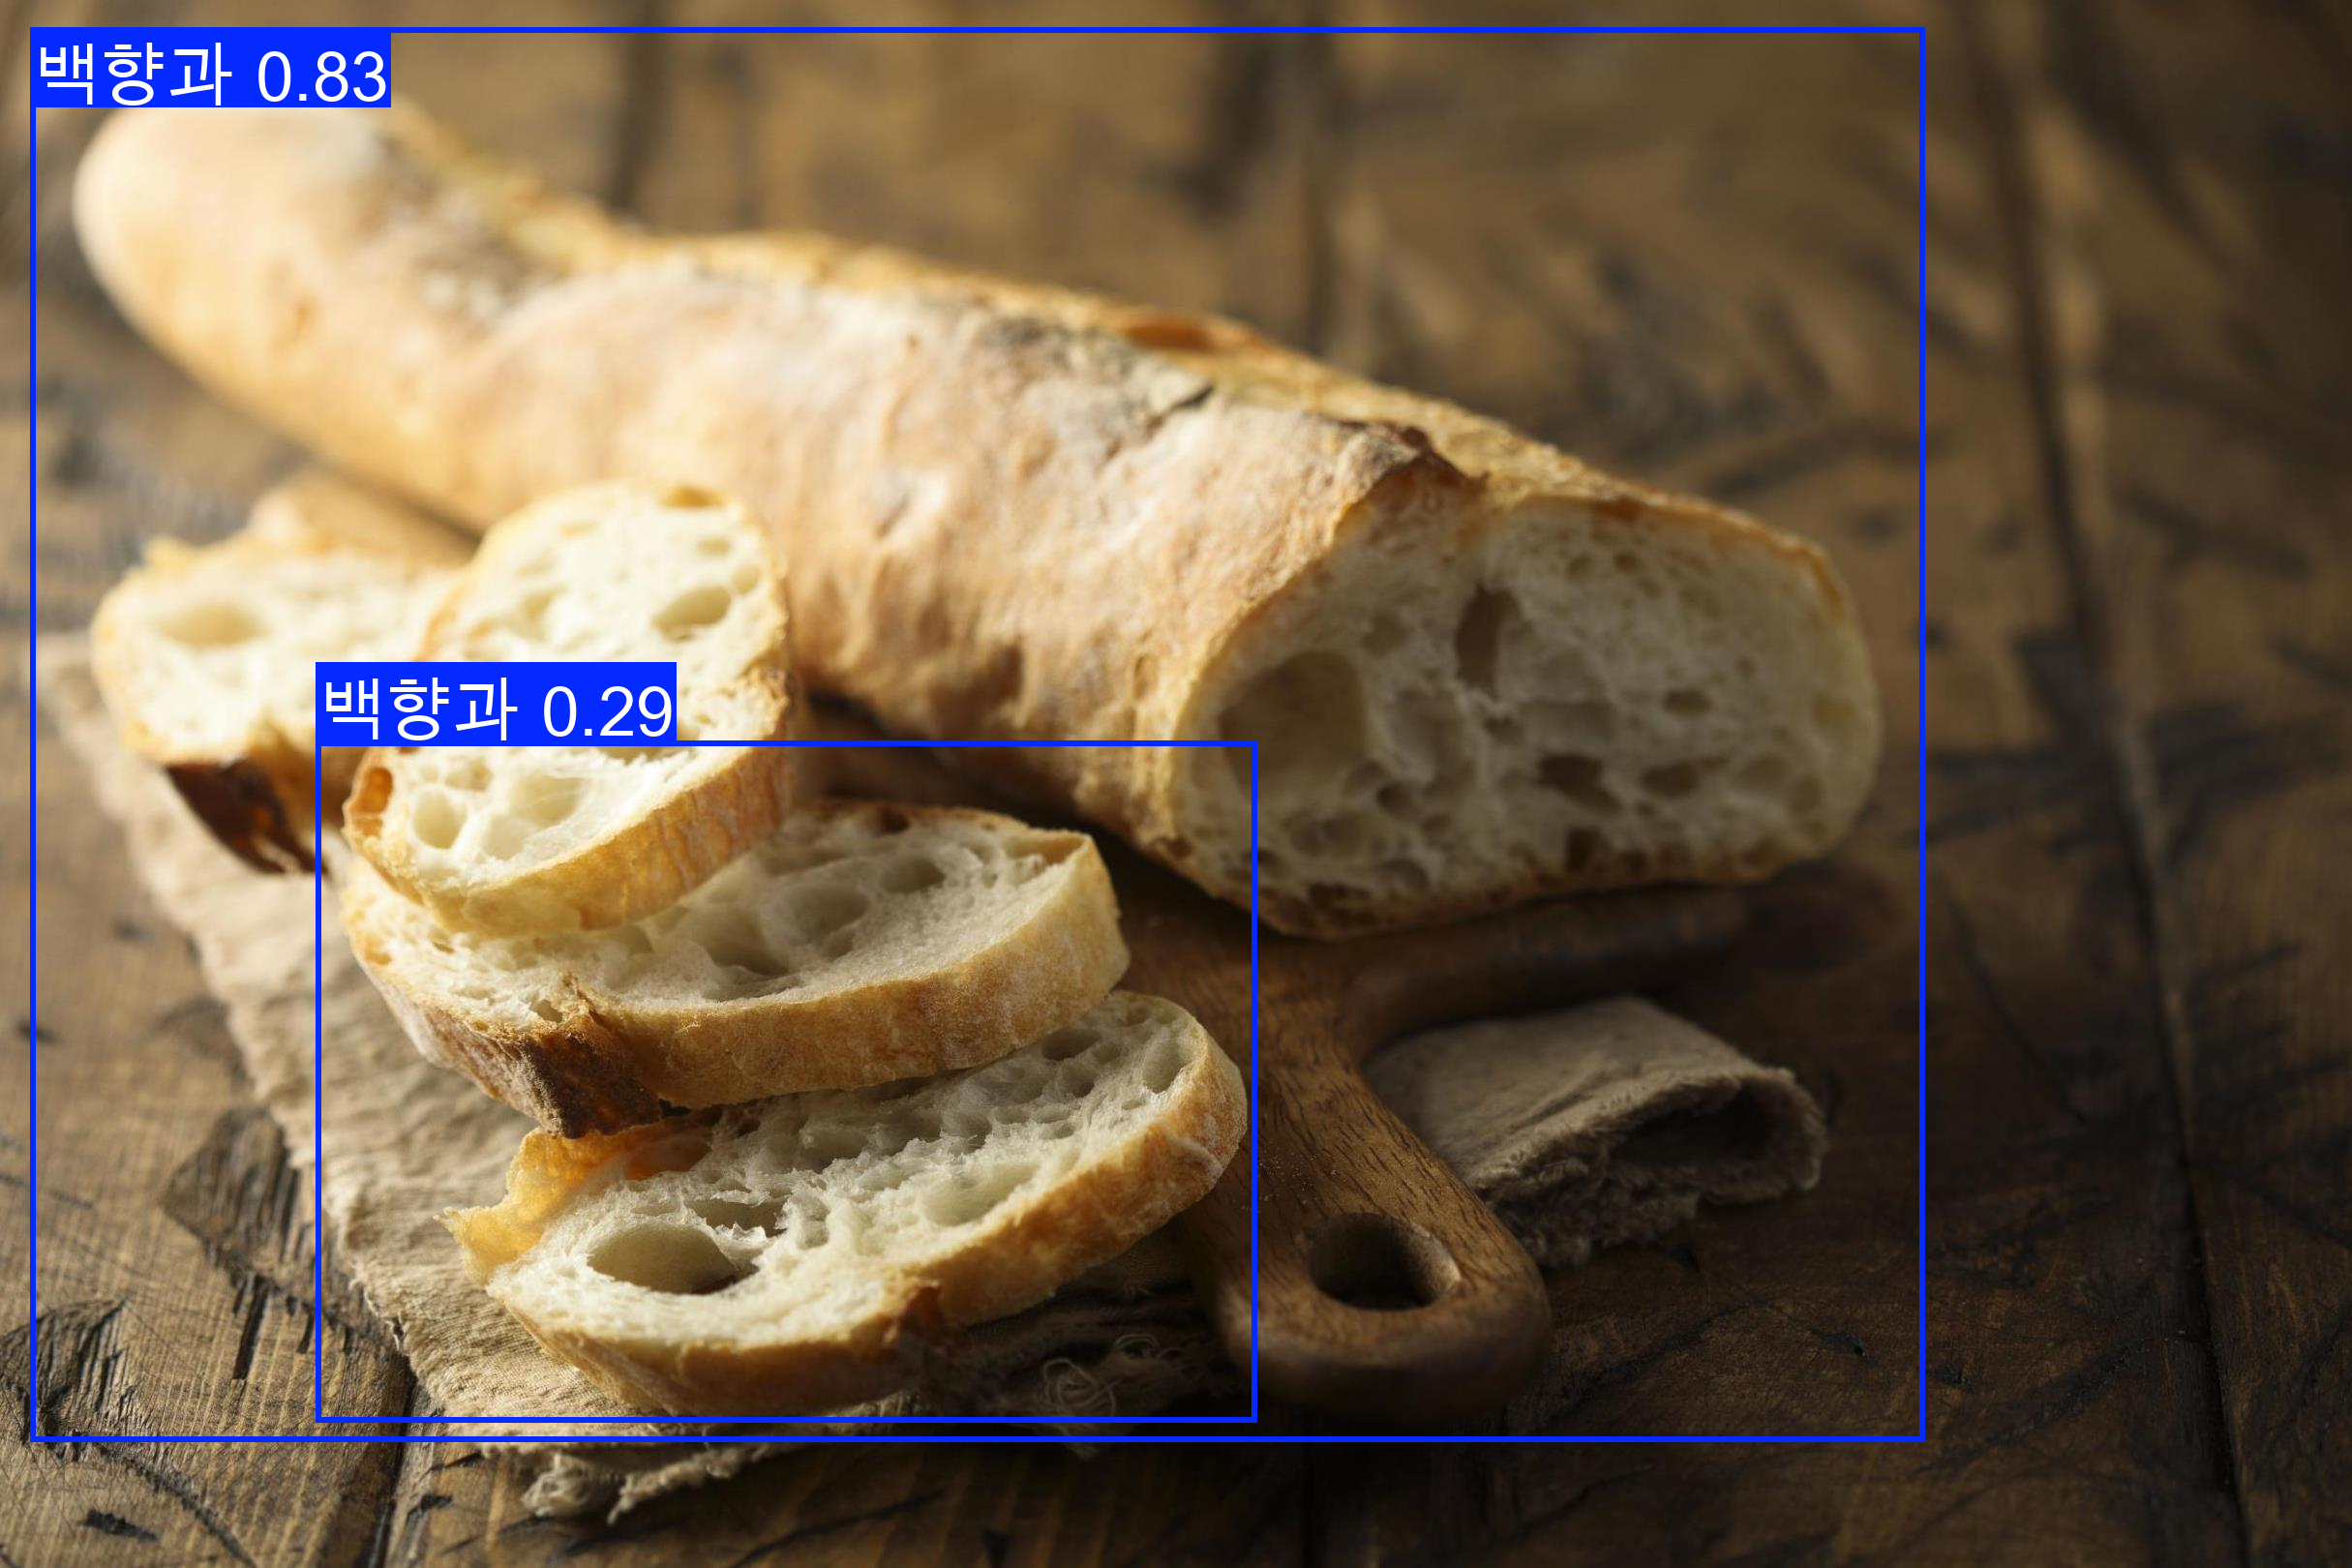

In [10]:
# 🖼️ 6. 테스트 이미지 예측 결과 확인

# 이미지 경로
test_img_path = "/content/drive/MyDrive/project/images/test/A020118XX_10997.jpg"

# 예측 실행
results = model(test_img_path)
results[0].show()  # Colab에서 이미지 출력


In [11]:
# 💾 7. 추론 결과 저장
results = model(test_img_path, save=True, save_txt=True, save_crop=True)



image 1/1 /content/drive/MyDrive/project/images/test/A020118XX_10997.jpg: 448x640 2 백향과s, 13.3ms
Speed: 4.6ms preprocess, 13.3ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/project/runs/detect/yolo_food_detection22
1 label saved to /content/drive/MyDrive/project/runs/detect/yolo_food_detection22/labels


In [15]:
from ultralytics.utils.metrics import ConfusionMatrix
import supervision as sv
import cv2, glob
import numpy as np

# 2. 모델 로드 (Colab에 저장된 best.pt 사용)
model = YOLO('/content/drive/MyDrive/project/runs/detect/yolo_food_detection2/weights/best.pt')


In [16]:
# 3. Confusion matrix & 클래스 성능 평가 (val dataset 기준)
results = model.val(data='/content/drive/MyDrive/project/data.yaml', plots=True)
cm: ConfusionMatrix = results.confusion_matrix



Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 68,133,198 parameters, 0 gradients, 257.4 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.0 ms, read: 221.5±80.0 MB/s, size: 378.0 KB)


val: Scanning /content/drive/MyDrive/project/labels/val.cache... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:10<00:00,  4.87it/s]


                   all        800        912      0.885      0.851       0.93      0.805
                   백향과        800        912      0.885      0.851       0.93      0.805
Speed: 0.3ms preprocess, 4.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val


In [31]:
# 3-1. Confusion matrix 시각화 (PNG 저장 및 출력)
cm.plot(normalize=True, save_dir='/content')
from IPython.display import Image
Image('/content/drive/MyDrive/project/runs/detect/yolo_food_detection2/confusion_matrix.png')



In [19]:
# 3-2. mAP 등 전체 요약 지표
print(f"mAP@0.5: {results.box.map50:.4f}")
print(f"mAP@0.5-0.95: {results.box.map:.4f}")



mAP@0.5: 0.9298
mAP@0.5-0.95: 0.8046


In [30]:
# 4. Test 데이터 전체에 대해 예측 결과 영상으로 저장
img_paths = sorted(glob.glob('/content/drive/MyDrive/project/images/test/*.jpg'))
height, width = cv2.imread(img_paths[0]).shape[:2]
out = cv2.VideoWriter('/content/drive/MyDrive/project/test_result_rgb.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, (width, height))

for img_p in img_paths:
    img = cv2.imread(img_p)
    res = model(img)[0]
    annotated = res.plot()
    out.write(annotated)

out.release()
print("✅ RGB 기반 test_result_rgb.mp4 저장 완료")


0: 448x640 2 백향과s, 14.9ms
Speed: 5.0ms preprocess, 14.9ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 백향과, 35.0ms
Speed: 83.4ms preprocess, 35.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 2 백향과s, 12.0ms
Speed: 3.1ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 416x640 2 백향과s, 13.0ms
Speed: 2.9ms preprocess, 13.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)

0: 448x640 1 백향과, 12.7ms
Speed: 3.0ms preprocess, 12.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 백향과, 12.0ms
Speed: 3.1ms preprocess, 12.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 백향과, 15.2ms
Speed: 3.3ms preprocess, 15.2ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 백향과, 11.9ms
Speed: 3.1ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 512x640 